In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import time

# in house functions: 
%run 'DST_fun.ipynb' # model_report() and review_vector() 

# importing training set
train_df = pd.read_csv("../data/avis/train_noYC_lemma_sent_equil.csv", index_col=0)
feature_cols = ['n_avis','sentiment_norm','longueur_texte']+ [colname for colname in train_df.columns if "bank_" in colname] 
# split between features(X) and target(y)
y_train = train_df.etoiles -1 # les classes doivent commencer à 0, remettre +1 pour interpretation!
X_train = train_df[feature_cols]

# importing test set
test_df = pd.read_csv('../data/avis/test_noYC_lemma_sent_equil.csv')
# split between features(X) and target(y)
X_test = test_df.drop("etoiles", axis =1)
X_test = test_df[feature_cols]
y_test = test_df['etoiles'] -1 # les classes doivent commencer à 0, remettre +1 pour interpretation!

model_name = "XGBoost_mac_mini"

X_train.head(3)

/var/folders/hk/zlc2z4tj3xv3c8bq4srx4y8m0000gq/T/ipykernel_77930/2800394408.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


n_avis  sentiment_norm  longueur_texte  bank__01BanqueenLigne  \
5529  -0.426925        0.804014       -0.444335                      0   
57109 -0.426925        0.974431       -0.512719                      0   
83051  0.015767        0.631495       -0.475419                      0   

       bank__Anytime  bank__BforBank  bank__Blank  bank__BoursoBank  \
5529               0               0            0                 0   
57109              0               0            0                 0   
83051              0               0            0                 0   

       bank__BoursoramaBanque  bank__Btocadvice  ...  bank__ZELF  \
5529                        0                 0  ...           0   
57109                       0                 0  ...           0   
83051                       1                 0  ...           0   

       bank__bcfinance.fr  bank__floapay.com  bank__franfinance.fr  bank__ips  \
5529                    0                  0                     0          0   
57109                   0                  0                     0          0   
83051                   0                  0                     0          0   

       bank__laNef  bank__manager.one  bank__moneywalkie.com  \
5529             0                  0                      0   
57109            0                  0                      0   
83051            0                  0                      0   

       bank__propulsebyca.fr  bank__qui-est-la-banque-la-moins-chere.com  
5529                       0                                           0  
57109                      0                                           0  
83051                      0                                           0  

[3 rows x 58 columns]

[0]	train-mlogloss:1.54326	eval-mlogloss:1.54905
[1]	train-mlogloss:1.48688	eval-mlogloss:1.49782
[2]	train-mlogloss:1.43782	eval-mlogloss:1.45400
[3]	train-mlogloss:1.39470	eval-mlogloss:1.41562
[4]	train-mlogloss:1.35635	eval-mlogloss:1.38180
[5]	train-mlogloss:1.32214	eval-mlogloss:1.35176
[6]	train-mlogloss:1.29107	eval-mlogloss:1.32496
[7]	train-mlogloss:1.26332	eval-mlogloss:1.30084
[8]	train-mlogloss:1.23819	eval-mlogloss:1.27961
[9]	train-mlogloss:1.21515	eval-mlogloss:1.25992
[10]	train-mlogloss:1.19446	eval-mlogloss:1.24267
[11]	train-mlogloss:1.17529	eval-mlogloss:1.22693
[12]	train-mlogloss:1.15742	eval-mlogloss:1.21228
[13]	train-mlogloss:1.14111	eval-mlogloss:1.19884
[14]	train-mlogloss:1.12563	eval-mlogloss:1.18570
[15]	train-mlogloss:1.11191	eval-mlogloss:1.17484
[16]	train-mlogloss:1.09906	eval-mlogloss:1.16507
[17]	train-mlogloss:1.08675	eval-mlogloss:1.15526
[18]	train-mlogloss:1.07589	eval-mlogloss:1.14713
[19]	train-mlogloss:1.06546	eval-mlogloss:1.13956
[20]	train

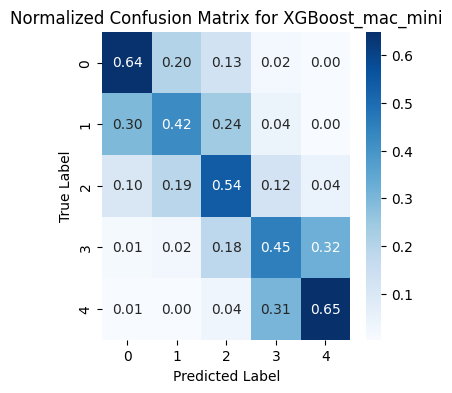

creating new csv for XGBoost_mac_mini


In [2]:
# simple modelling XGB- n_avis, sent, text length
test_name =f"{model_name}- n_avis, sent, text length, companies"

train =xgb.DMatrix(data= X_train,label = y_train)
test = xgb.DMatrix(data= X_test, label = y_test)
params = {'booster': 'gbtree', 'learning_rate': 0.1,
           'objective': 'multi:softmax', 'num_class' : 5,
           'seed':7}
t0= time.time()
model = xgb.train(params=params, dtrain=train, 
                  num_boost_round=100, evals=[(train, 'train'), (test, 'eval')])
y_pred = model.predict(test)
model_report(test_name, model_name)

# Essai Grid base

Fitting 3 folds for each of 8748 candidates, totalling 26244 fits
[CV 1/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.7;, score=0.540 total time=   0.4s
[CV 3/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.7;, score=0.527 total time=   0.4s
[CV 1/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=0.539 total time=   0.4s
[CV 2/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.7;, score=0.532 total time=   0.4s
[CV 3/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=0.522 total time=   0.5s
[CV 2/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_chil

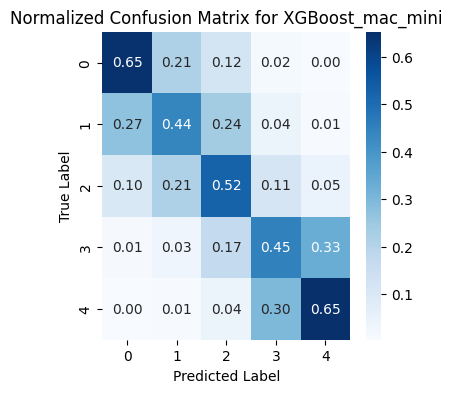

In [3]:
test_name =f"{model_name}- GRID n_avis, sent, text length, companies"
train = xgb.DMatrix(data= X_train,label = y_train)
test = xgb.DMatrix(data= X_test, label = y_test)

params = {'learning_rate': [0.1, 0.01, 0.05],
          'max_depth': [3, 4, 5, 6],
          'min_child_weight': [1, 3, 5],
          'gamma': [0, 0.1, 0.2],
          'subsample': [0.7, 0.8, 0.9],
          'colsample_bytree': [0.7, 0.8, 0.9],
          'reg_lambda': [0, 1, 10],
          'reg_alpha': [0, 0.1, 1]
}
t0= time.time()
xgb_clf = XGBClassifier(random_state = 7)
model = GridSearchCV(estimator= xgb_clf, param_grid = params,n_jobs = -1,
                     scoring = 'accuracy', cv = 3,verbose = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Saving the model
from joblib import dump, load
dump(model, '../data/XGBoost_grid_base.joblib')
# pour charger le modèle:
# grid_search = load('../data/XGBoost_grid_base.joblib')

# scores:
model_report(test_name, model_name)

# Test avec TFIDF

[0]	train-mlogloss:1.53906	eval-mlogloss:1.56050
[1]	train-mlogloss:1.47827	eval-mlogloss:1.51680
[2]	train-mlogloss:1.42489	eval-mlogloss:1.47692
[3]	train-mlogloss:1.37813	eval-mlogloss:1.44239
[4]	train-mlogloss:1.33677	eval-mlogloss:1.41414
[5]	train-mlogloss:1.29902	eval-mlogloss:1.38800
[6]	train-mlogloss:1.26519	eval-mlogloss:1.36569
[7]	train-mlogloss:1.23362	eval-mlogloss:1.34456
[8]	train-mlogloss:1.20468	eval-mlogloss:1.32680
[9]	train-mlogloss:1.17793	eval-mlogloss:1.30906
[10]	train-mlogloss:1.15354	eval-mlogloss:1.29267
[11]	train-mlogloss:1.13150	eval-mlogloss:1.27836
[12]	train-mlogloss:1.11144	eval-mlogloss:1.26554
[13]	train-mlogloss:1.09170	eval-mlogloss:1.25402
[14]	train-mlogloss:1.07273	eval-mlogloss:1.24285
[15]	train-mlogloss:1.05612	eval-mlogloss:1.23200
[16]	train-mlogloss:1.04015	eval-mlogloss:1.22264
[17]	train-mlogloss:1.02573	eval-mlogloss:1.21421
[18]	train-mlogloss:1.01214	eval-mlogloss:1.20663
[19]	train-mlogloss:0.99947	eval-mlogloss:1.19943
[20]	train

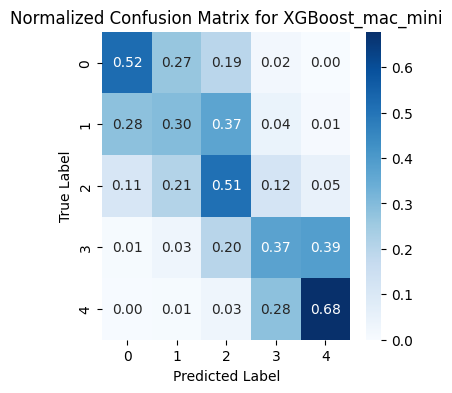

In [4]:
test_name =f"{model_name}-TFIDF, n_avis, sent, text length, companies"

# Vectorization des avis lémmatisés
X_train = review_vector(train_df,feature_cols)
X_test = review_vector(test_df,feature_cols)

train =xgb.DMatrix(data= X_train,label = y_train)
test = xgb.DMatrix(data= X_test, label = y_test)
params = {'booster': 'gbtree', 'learning_rate': 0.1,
           'objective': 'multi:softmax', 'num_class' : 5,
           'seed':7}
t0= time.time()
model = xgb.train(params=params, dtrain=train, 
                  num_boost_round=100, evals=[(train, 'train'), (test, 'eval')])
y_pred = model.predict(test)
model_report(test_name, model_name)

Fitting 3 folds for each of 8748 candidates, totalling 26244 fits
[CV 2/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.7;, score=0.573 total time=   5.1s
[CV 2/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=0.576 total time=   5.1s
[CV 3/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.7;, score=0.569 total time=   5.2s
[CV 1/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.7;, score=0.584 total time=   5.2s
[CV 1/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=0.582 total time=   5.3s
[CV 3/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_chil

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, subsample=0.7;, score=0.577 total time=   7.9s
[CV 3/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, subsample=0.7;, score=0.578 total time=   7.7s
[CV 1/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.597 total time=   8.0s
[CV 2/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.585 total time=   8.0s
[CV 3/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, subsample=0.8;, score=0.572 total time=   8.1s
[CV 1/3] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, subsample=0.9;,

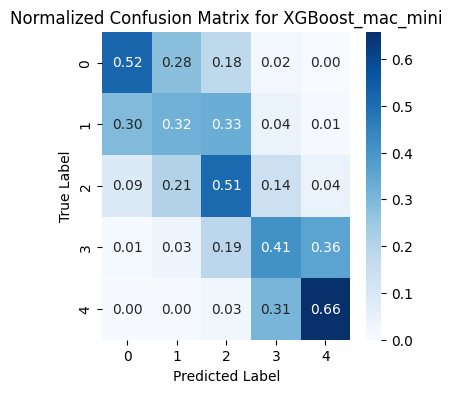

In [5]:
test_name =f"{model_name}- GRID, TFIDF, n_avis, sent, text length, companies"

params = {'learning_rate': [0.1, 0.01, 0.05],
          'max_depth': [3, 4, 5, 6],
          'min_child_weight': [1, 3, 5],
          'gamma': [0, 0.1, 0.2],
          'subsample': [0.7, 0.8, 0.9],
          'colsample_bytree': [0.7, 0.8, 0.9],
          'reg_lambda': [0, 1, 10],
          'reg_alpha': [0, 0.1, 1],
        }
t0= time.time()
xgb_clf = XGBClassifier(random_state = 7)
model = GridSearchCV(estimator= xgb_clf, param_grid = params,n_jobs= -1,
                      scoring = 'accuracy', cv = 3,
                    verbose = 3)
model.fit(X_train, y_train)

# Saving the model
from joblib import dump, load

# After your grid search has completed
dump(model, '../data/XGBoost_grid_tfidf.joblib')
# pour charger le modèle:
# model_load = load('../data/XGBoost_grid_tfidf.joblib')

model_report(test_name, model_name)

In [6]:
bench = pd.read_csv(f'../reports/benchmark/{model_name}_model_benchmark.csv', index_col=0).drop_duplicates(subset=['model'], keep= "last")
bench

model grid search  \
0  XGBoost_mac_mini- n_avis, sent, text length, c...          no   
0  XGBoost_mac_mini- GRID n_avis, sent, text leng...         yes   
0  XGBoost_mac_mini-TFIDF, n_avis, sent, text len...          no   
0  XGBoost_mac_mini- GRID, TFIDF, n_avis, sent, t...         yes   

                                    used/best params score  precision  recall  \
0                           baseline hyperparameters    na       0.54    0.54   
0  {'colsample_bytree': 0.7, 'gamma': 0.1, 'learn...  0.54       0.54    0.54   
0                           baseline hyperparameters    na       0.47    0.48   
0  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...  0.48       0.48    0.48   

     f1  time_taken_mns    run_date  
0  0.54            0.01  2024-02-07  
0  0.54           34.91  2024-02-07  
0  0.47            0.15  2024-02-07  
0  0.48          593.84  2024-02-08